# **Data Imputation (KNN), (MICE) and Model Training**

In [16]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [2]:
# Dataframe
houses_missing = pd.read_csv("https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.5_MAR.csv", header=0)
houses_missing.drop('Unnamed: 0', axis=1, inplace=True)
houses_missing.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,452600.0,8.3252,41.0,880.0,129.0,NaN,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,NaN,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,NaN,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,NaN,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25


**First I need to know where I have missing values.**

In [3]:
# Function for finding missing values.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

# Using the function to check the missing values.
houses_missing_2 = missing_values_table(houses_missing)
houses_missing_2

Your selected dataframe has 9 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
median_income,10320,50.0
housing_median_age,10320,50.0
population,10320,50.0


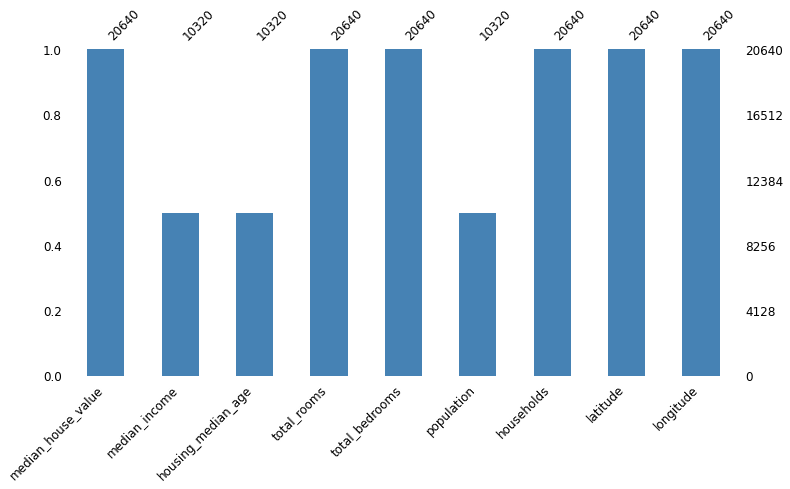

In [4]:
# Visual representation of what is missing.
msno.bar(houses_missing,figsize=(12, 6), fontsize=12, color='steelblue')

## **1) KNN Imputation and M1 Training**

In [5]:
# K-Nearest Neighbor Imputation (KNN)
houses_imputed_knn = houses_missing.copy(deep=True)
c_knn = houses_imputed_knn.columns
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(houses_imputed_knn)
knn_imputed_array = knn_imputer.transform(houses_imputed_knn)
houses_imputed_knn_2 = pd.DataFrame(data=knn_imputed_array, columns=c_knn)


**Check that we have succesfully imputed the data**

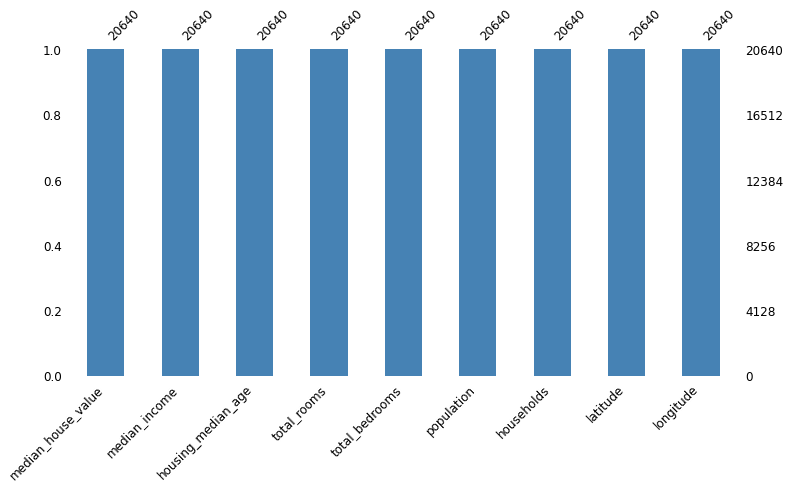

In [6]:
msno.bar(houses_imputed_knn_2,figsize=(12, 6), fontsize=12, color='steelblue')

**Check how good was the imputation compared to the original data**

In [7]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

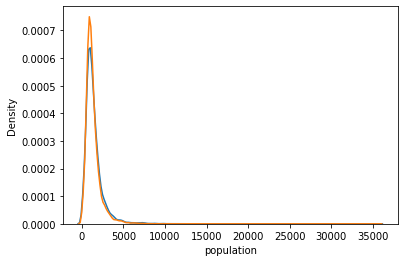

In [8]:
sns.kdeplot(houses['population'])
sns.kdeplot(houses_imputed_knn_2['population'])

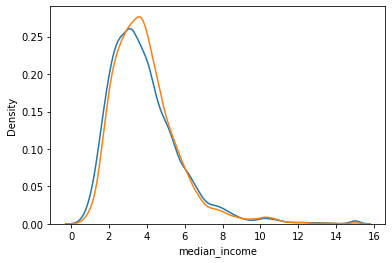

In [9]:
sns.kdeplot(houses['median_income'])
sns.kdeplot(houses_imputed_knn_2['median_income'])

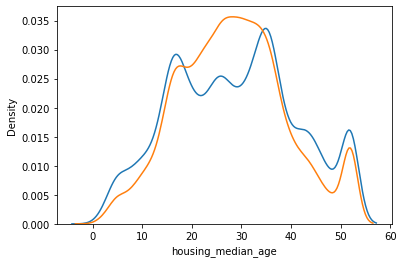

In [10]:
sns.kdeplot(houses['housing_median_age'])
sns.kdeplot(houses_imputed_knn_2['housing_median_age'])

**Standardize the Data**

In [11]:
# Get all columns from the dataset
names = houses_imputed_knn_2.columns

# Create the scaler object
scaler = StandardScaler()

# Fit the data on the scaler object
scaled_houses_imputed_knn = scaler.fit_transform(houses_imputed_knn_2)
scaled_houses_imputed_knn = pd.DataFrame(scaled_houses_imputed_knn, columns=names)
scaled_houses_imputed_knn.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129631,2.506269,1.171539,-0.804819,-0.970706,-0.653613,-0.977033,1.052548,-1.327835
1,1.314156,2.492684,-0.661358,2.045890,1.348649,1.239953,1.669961,1.043185,-1.322844
2,1.258693,1.896807,2.179631,-0.535746,-0.825895,-0.697114,-0.843637,1.038503,-1.332827
3,1.165100,0.975422,2.179631,-0.624215,-0.719067,-0.819671,-0.733781,1.038503,-1.337818
4,1.172900,-0.050184,2.179631,-0.462404,-0.612239,-0.792483,-0.629157,1.038503,-1.337818


**Now I am going to check the relationship between every column and the median_house_value column.**

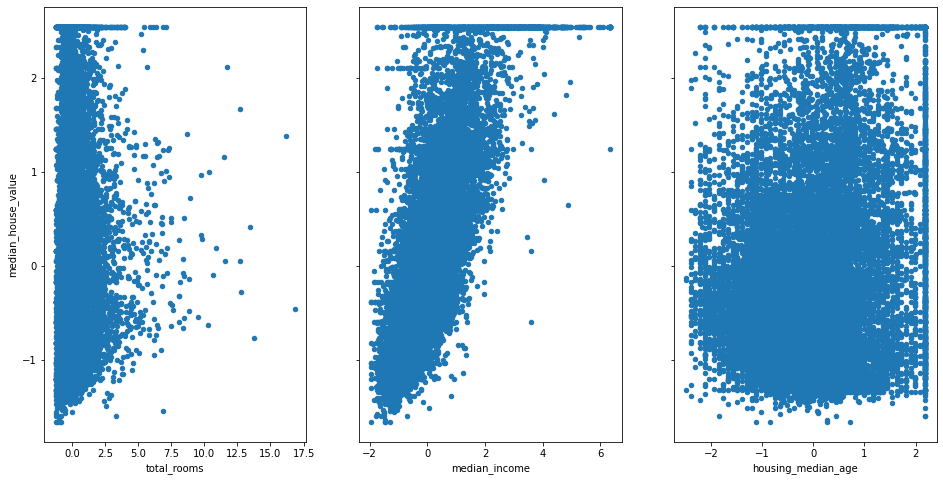

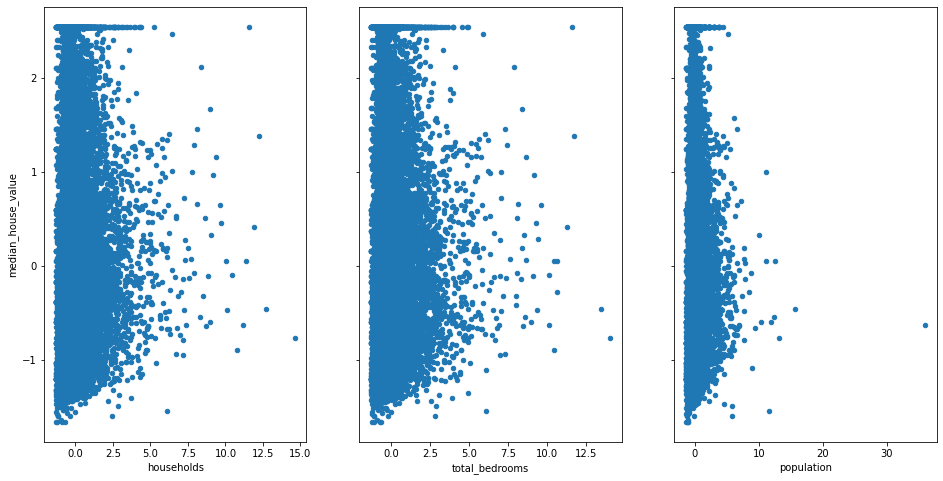

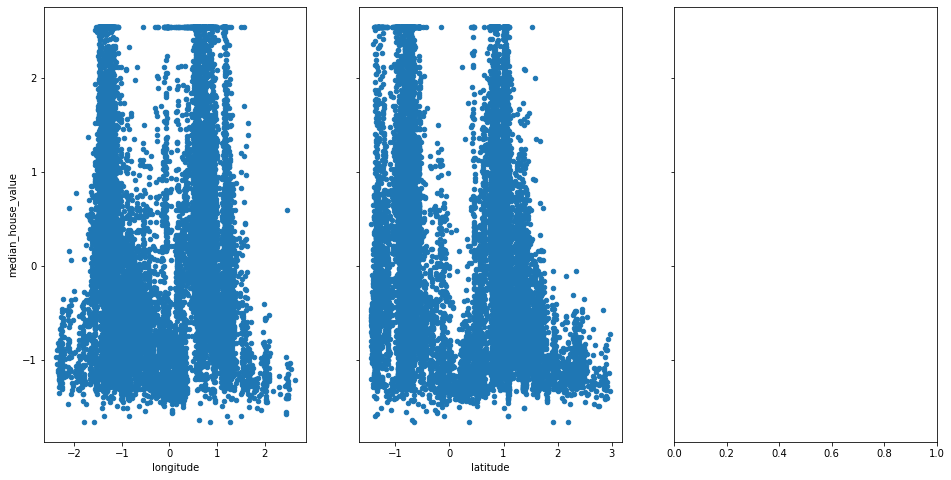

In [12]:
# Plot Graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_houses_imputed_knn.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_houses_imputed_knn.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))
scaled_houses_imputed_knn.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))

# Plot Graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_houses_imputed_knn.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_houses_imputed_knn.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))
scaled_houses_imputed_knn.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))

# Plot Graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_houses_imputed_knn.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_houses_imputed_knn.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))

**As we can see from the previous graphs only median_income has a linear relationship with median_house_value.**

**Extraction of X and Y Data**

In [13]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X=scaled_houses_imputed_knn[X_Features]
Y=scaled_houses_imputed_knn['median_house_value']

print(scaled_houses_imputed_knn.shape)
print(X.shape)
print(Y.shape)

(20640, 9)
(20640, 8)
(20640,)


**Spliting the Dataset**

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


**Performing Linear Regression**

In [15]:
M1=LinearRegression()
M1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_predict = M1.predict(x_test)

**Results**

In [19]:
print("RMSE: ", sqrt(mean_squared_error(y_test,y_predict)))
print("MSE: ", mean_squared_error(y_test,y_predict))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print("R^2: ", r2_score(y_test,y_predict))

RMSE:  0.5444858121327647
MSE:  0.2964647996138764
MAE:  0.39452035256798146
R^2:  0.6990466199965089


## **2) MICE Imputation and M2 Training**

In [20]:
# Multivariate imputation by chained equations (MICE)
houses_imputed_mice = houses_missing.copy(deep=True)
c = houses_imputed_mice.columns
mice_imputer = IterativeImputer(random_state=0)
mice_imputer.fit(houses_imputed_mice)
mice_imputed_array = mice_imputer.transform(houses_imputed_mice)
houses_imputed_mice_2 = pd.DataFrame(data=mice_imputed_array, columns=c)

**Check that we have succesfully imputed the data**

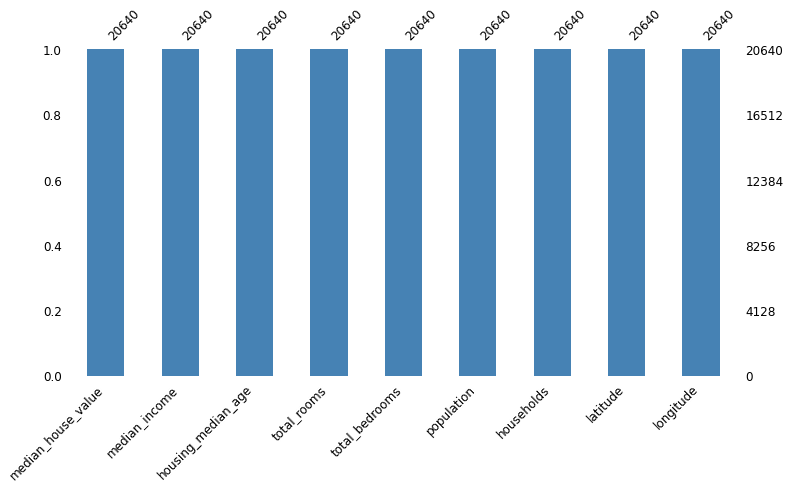

In [21]:
msno.bar(houses_imputed_mice_2,figsize=(12, 6), fontsize=12, color='steelblue')

**Check how good was the imputation compared to the original data**

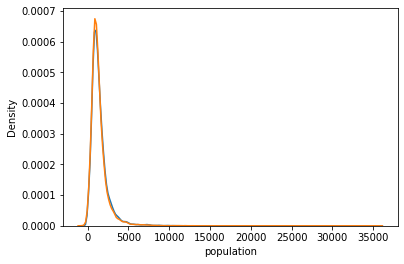

In [22]:
sns.kdeplot(houses['population'])
sns.kdeplot(houses_imputed_mice_2['population'])

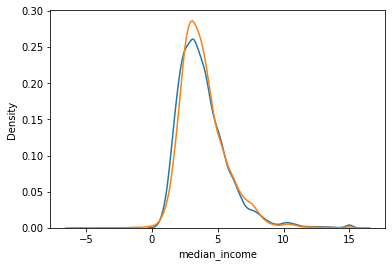

In [23]:
sns.kdeplot(houses['median_income'])
sns.kdeplot(houses_imputed_mice_2['median_income'])

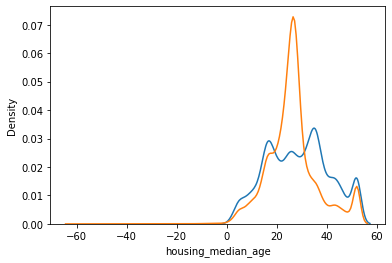

In [24]:
sns.kdeplot(houses['housing_median_age'])
sns.kdeplot(houses_imputed_mice_2['housing_median_age'])

**Standardize the Data**

In [25]:
# Get all columns from the dataset
names = houses_imputed_mice_2.columns

# Create the scaler object
scaler = StandardScaler()

# Fit the data on the scaler object
scaled_houses_imputed_mice = scaler.fit_transform(houses_imputed_mice_2)
scaled_houses_imputed_mice = pd.DataFrame(scaled_houses_imputed_mice, columns=names)
scaled_houses_imputed_mice.head()

,median_house_value,median_income,housing_median_age,total_rooms,total_bedrooms,population,households,latitude,longitude
0,2.129631,2.477055,1.438537,-0.804819,-0.970706,-1.283406,-0.977033,1.052548,-1.327835
1,1.314156,2.463670,-0.528867,2.045890,1.348649,1.719169,1.669961,1.043185,-1.322844
2,1.258693,1.876524,2.520610,-0.535746,-0.825895,-1.000485,-0.843637,1.038503,-1.332827
3,1.165100,0.968641,2.520610,-0.624215,-0.719067,-0.928447,-0.733781,1.038503,-1.337818
4,1.172900,-0.041937,2.520610,-0.462404,-0.612239,-0.734955,-0.629157,1.038503,-1.337818


**Now I am going to check the relationship between every column and the median_house_value column.**

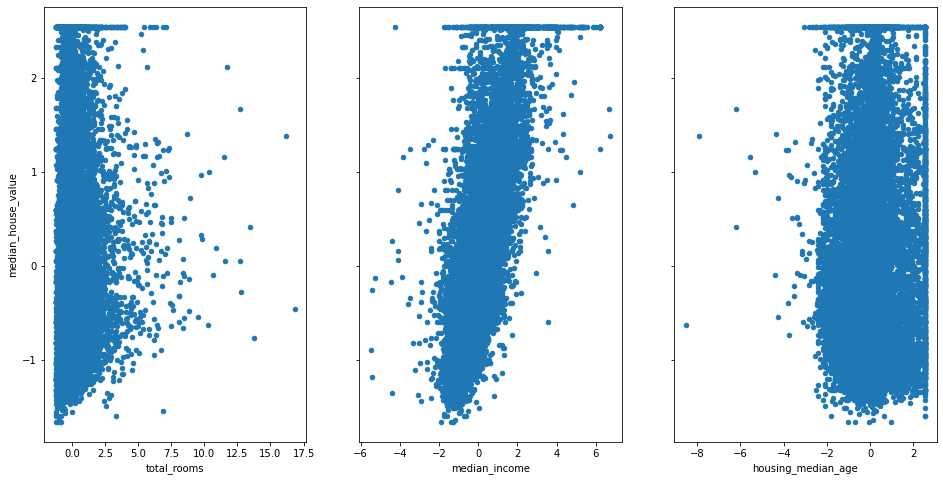

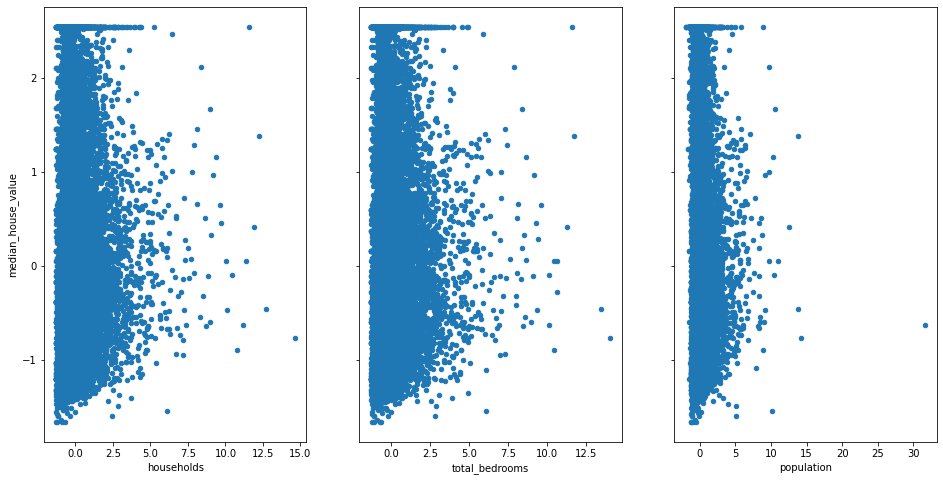

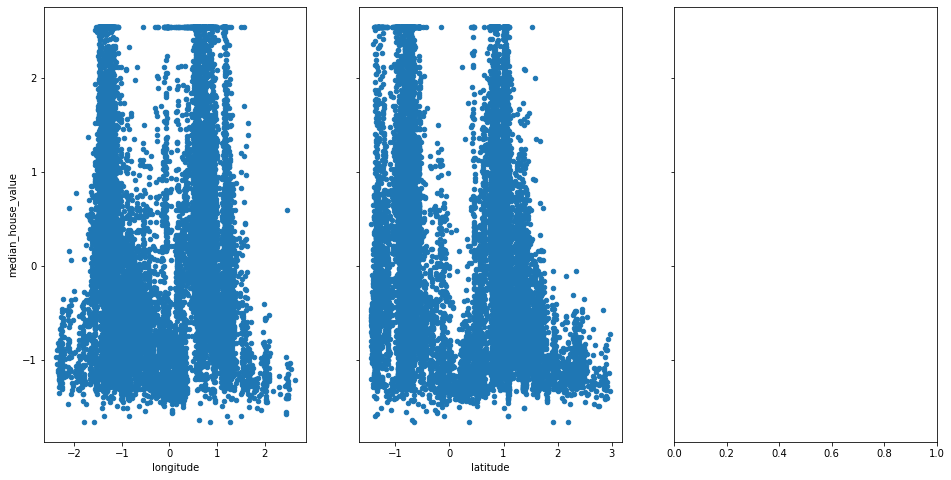

In [26]:
# Plot Graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_houses_imputed_mice.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_houses_imputed_mice.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))
scaled_houses_imputed_mice.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))

# Plot Graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_houses_imputed_mice.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_houses_imputed_mice.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))
scaled_houses_imputed_mice.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))

# Plot Graphs
fig,axs=plt.subplots(1,3,sharey=True)
scaled_houses_imputed_mice.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_houses_imputed_mice.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))

**As we can see from the previous graphs again only median_income has a linear relationship with median_house_value.**

**Extraction of X and Y Data**

In [27]:
X_Features=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X=scaled_houses_imputed_mice[X_Features]
Y=scaled_houses_imputed_mice['median_house_value']

print(scaled_houses_imputed_mice.shape)
print(X.shape)
print(Y.shape)

(20640, 9)
(20640, 8)
(20640,)


**Spliting the Dataset (80% Training, 20% Testing)**

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


**Performing Linear Regression**

In [29]:
M2=LinearRegression()
M2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y_predict = M2.predict(x_test)

**Results**

In [31]:
print("RMSE: ", sqrt(mean_squared_error(y_test,y_predict)))
print("MSE: ", mean_squared_error(y_test,y_predict))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print("R^2: ", r2_score(y_test,y_predict))

RMSE:  0.4960101919822986
MSE:  0.24602611055031676
MAE:  0.3401554339361601
R^2:  0.750248968391306


## **3) Compare M1 and M2.**

1) **Are there differences?**

In terms of their approach there is no difference, however the implementation of imputation KNN/MICE, made the whole process different in terms of completing the NaN data. As for the machine learning models I have used linear regression approach. To be honest I could have used more models here and take better results such as random forest but the goal of this task is how imputation affects the model itself so there was no point to try different types of machine learning techniques here.

2) **If so, why do you think they provide different performance?**

M1 and M2 provide different performance because KNN using different approach to impute the missing data from MICE.On the one hand KNN imputed the data in a such a way close to the original ones but the MICE imputed the data with the biggest corellation better as we can see from the comparisson above between original data and imputed ones from both KNN and MICE. In conclusion, the better the impute to the data that has a direct relationship and affects the requested, the better performance our model will have because one variable depends on the other. In this particular example, the median_house_value has a direct relationship with the median_income, so the better the impute is done in this column, the better our model will perform. 

3) **Which one would you choose?**

I would choose the M2 model because it has a better (closer to 1 score) R2 Score and lower RMSE score (fits better) and MAE is smaller.

For M1:
```
RMSE:  0.5444858121327647
MSE:  0.2964647996138764
MAE:  0.39452035256798146
R^2:  0.6990466199965089
```
For M2✓:

```
RMSE:  0.4960101919822986
MSE:  0.24602611055031676
MAE:  0.3401554339361601
R^2:  0.750248968391306
```

